# ENTREGABLE 2

# INSTRUCCIONES

Realizar la segunda fase del análisis exploratorio usando el archivo CSV (`dataset_banco_clean.csv`) con 45189 filas y 17 columnas.

# Problema

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

# El set de datos después de la limpieza

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

In [12]:
# imports
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [56]:
ruta = "/content/dataset_banco_cleaned.csv"

# Cargar el archivo CSV con el delimitador ";"
data = pd.read_csv(ruta, sep=";")


In [39]:
print(data.shape)
data.head()

(43175, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,35,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139.0,1,-1.0,0,unknown,no
4,28,management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217.0,1,-1.0,0,unknown,no


In [41]:
print("Número total de filas:", len(data))

Número total de filas: 43175


In [11]:
# Veamos las variables categóricas y las numéricas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11995 entries, 0 to 11994
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11995 non-null  int64  
 1   job        11995 non-null  object 
 2   marital    11994 non-null  object 
 3   education  11994 non-null  object 
 4   default    11994 non-null  object 
 5   balance    11994 non-null  float64
 6   housing    11994 non-null  object 
 7   loan       11994 non-null  object 
 8   contact    11994 non-null  object 
 9   day        11994 non-null  float64
 10  month      11994 non-null  object 
 11  duration   11994 non-null  float64
 12  campaign   11994 non-null  float64
 13  pdays      11994 non-null  float64
 14  previous   11994 non-null  float64
 15  poutcome   11994 non-null  object 
 16  y          11994 non-null  object 
dtypes: float64(6), int64(1), object(10)
memory usage: 1.6+ MB


# ANÁLISIS UNIVARIANTE

La idea es usar herramientas estadísticas y de visualización para:

- Crear un mapa mental del set de datos (entenderlo)
- Empezar a encontrar respuestas a la pregunta planteada inicialmente (¿qué perfil tienen los clientes con mayor potencial de conversión?)

Llevaremos a cabo estas fases:

1. Análisis de cada variable de manera individual
2. Análisis univariado: relación de cada variable predictora con la variable a predecir
3. Análisis bivariado: relación de pares de variables predictoras con la variable a predecir

Para cada una de ellas generar un pequeño resumen

In [ ]:
# Enumerar todas las variables en el conjunto de datos
variables = data.columns.tolist()
print("Variables en el conjunto de datos:", variables)


Variables en el conjunto de datos: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


A continuación haremos un desglose individual de las variables, para poder ver concretamente de cada variable que valores son los más comunes y cuales los menos comunes, lo que nos resulta muy útil a la hora de comprobar a qué tiende el dataset de manera separada.

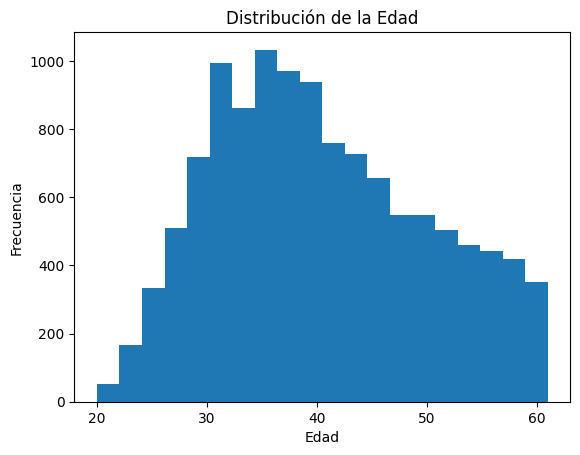

In [13]:
#AGE

plt.hist(data['age'], bins=20)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Edad')
plt.show()


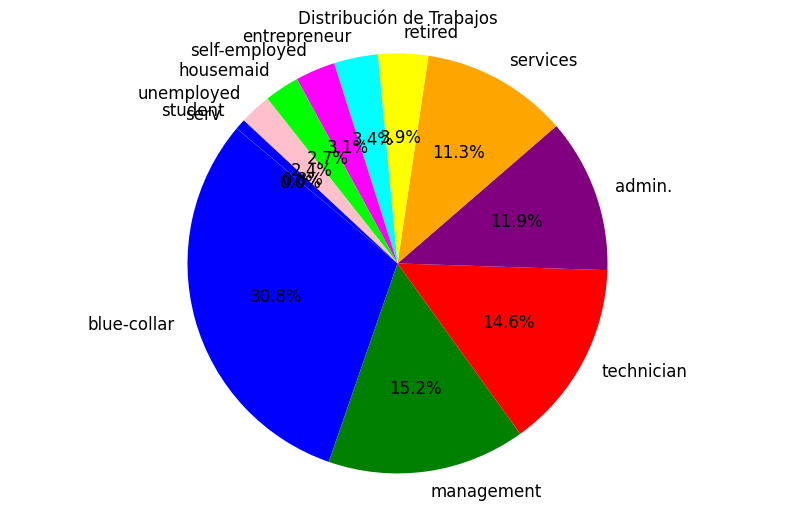

In [14]:
#JOB

# Calcular la frecuencia de cada categoría
job_counts = data['job'].value_counts()

# Calcular porcentaje de cada categoría
job_percentages = (job_counts / job_counts.sum()) * 100

# Definir colores para cada barra
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'cyan', 'magenta', 'lime', 'pink']

plt.figure(figsize=(10, 6))
patches, texts, autotexts = plt.pie(job_percentages, labels=job_percentages.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Trabajos')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Cambiar el tamaño del texto en las etiquetas y en los porcentajes
for text in texts + autotexts:
    text.set_fontsize(12)

plt.show()


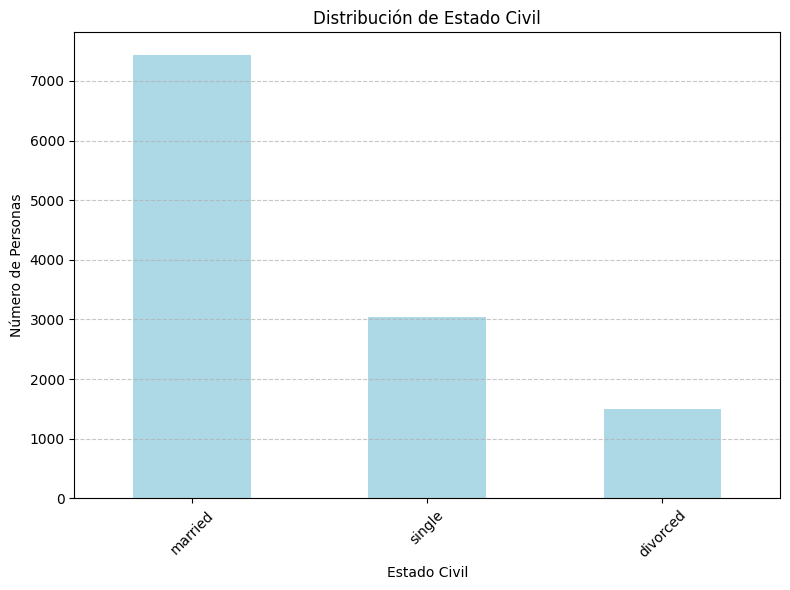

In [23]:
#MARITAL

marital_counts = data['marital'].value_counts()

plt.figure(figsize=(8, 6))
marital_counts.plot(kind='bar', color='lightblue')
plt.title('Distribución de Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Personas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

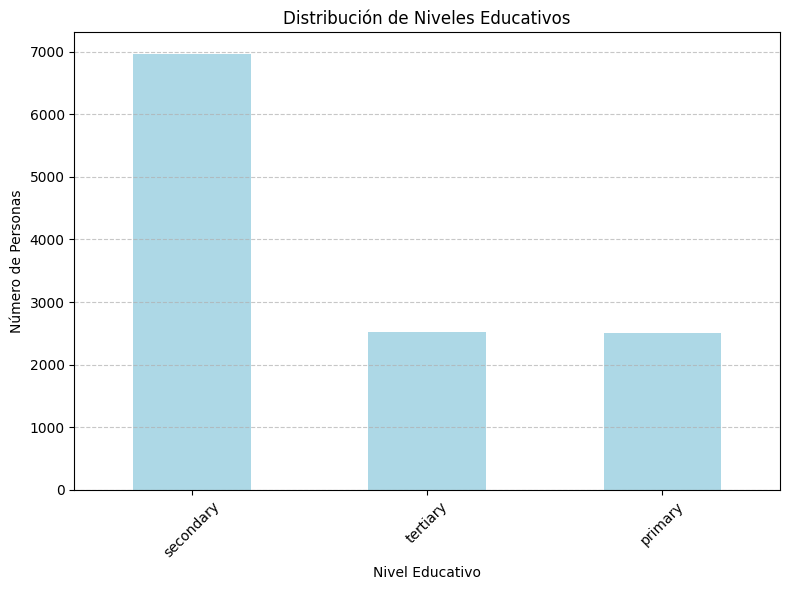

In [24]:
#EDUCATION

# Contar el número de personas en cada nivel educativo
education_counts = data['education'].value_counts()

# Graficar el gráfico de barras
plt.figure(figsize=(8, 6))
education_counts.plot(kind='bar', color='lightblue')
plt.title('Distribución de Niveles Educativos')
plt.xlabel('Nivel Educativo')
plt.ylabel('Número de Personas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir rejillas horizontales
plt.tight_layout()  # Ajustar el diseño de la gráfica para que se muestre correctamente
plt.show()

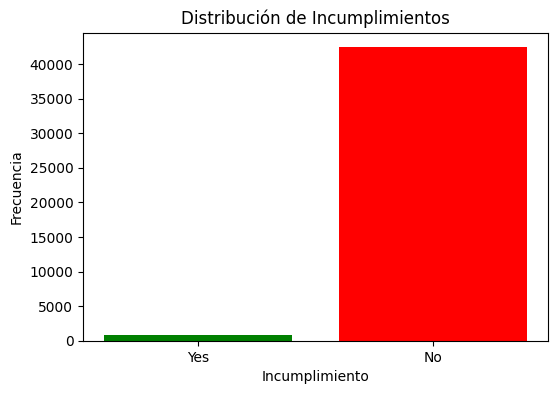

In [54]:
#DEFAULT

default_yes = data[data['default'] == 'yes']
default_no = data[data['default'] == 'no']

plt.figure(figsize=(6, 4))

# Gráfico de barras para 'yes' en verde
default_yes_counts = default_yes['default'].value_counts()
plt.bar('Yes', default_yes_counts, color='green')

# Gráfico de barras para 'no' en rojo
default_no_counts = default_no['default'].value_counts()
plt.bar('No', default_no_counts, color='red')

plt.xlabel('Incumplimiento')
plt.ylabel('Frecuencia')
plt.title('Distribución de Incumplimientos')
plt.show()


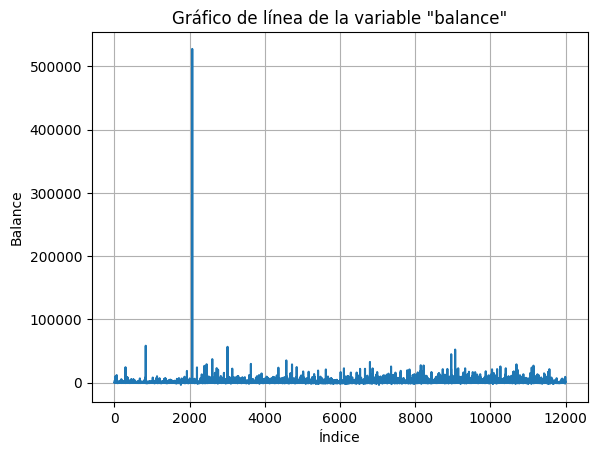

In [22]:
#BALANCE

plt.plot(data.index, data['balance'])
plt.title('Gráfico de línea de la variable "balance"')
plt.xlabel('Índice')
plt.ylabel('Balance')
plt.grid(True)
plt.show()

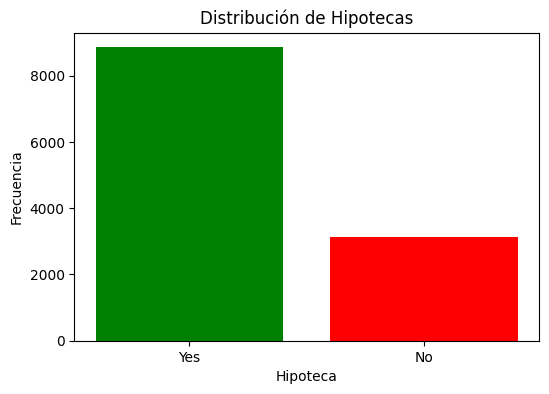

In [34]:
#HOUSING

# Dividir los datos en dos conjuntos basados en los valores de 'housing'
housing_yes = data[data['housing'] == 'yes']
housing_no = data[data['housing'] == 'no']

plt.figure(figsize=(6, 4))

# Gráfico de barras para 'yes' en verde
housing_yes_counts = housing_yes['housing'].value_counts()
plt.bar('Yes', housing_yes_counts, color='green')

# Gráfico de barras para 'no' en rojo
housing_no_counts = housing_no['housing'].value_counts()
plt.bar('No', housing_no_counts, color='red')

plt.xlabel('Hipoteca')
plt.ylabel('Frecuencia')
plt.title('Distribución de Hipotecas')
plt.show()


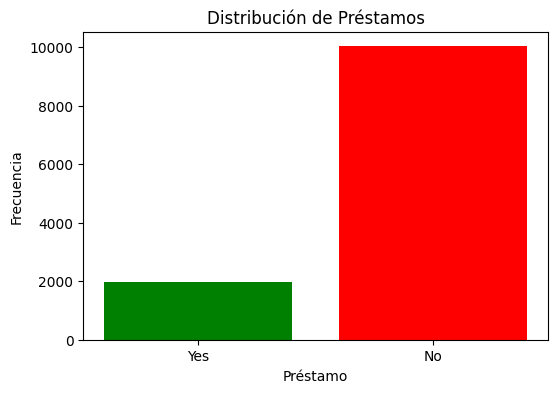

In [35]:
#LOAN

# Dividir los datos en dos conjuntos basados en los valores de 'loan'
loan_yes = data[data['loan'] == 'yes']
loan_no = data[data['loan'] == 'no']

plt.figure(figsize=(6, 4))

# Gráfico de barras para 'yes' en verde
loan_yes_counts = loan_yes['loan'].value_counts()
plt.bar('Yes', loan_yes_counts, color='green')

# Gráfico de barras para 'no' en rojo
loan_no_counts = loan_no['loan'].value_counts()
plt.bar('No', loan_no_counts, color='red')

plt.xlabel('Préstamo')
plt.ylabel('Frecuencia')
plt.title('Distribución de Préstamos')
plt.show()


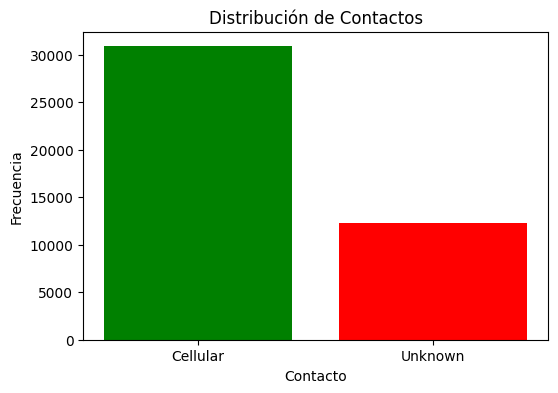

In [43]:
#CONTACT

# Dividir los datos en dos conjuntos basados en los valores de 'contact'
contact_cellular = data[data['contact'] == 'cellular']
contact_unknown = data[data['contact'] == 'unknown']

plt.figure(figsize=(6, 4))

# Gráfico de barras para 'cellular' en verde
contact_cellular_counts = contact_cellular['contact'].value_counts()
plt.bar('Cellular', contact_cellular_counts, color='green')

# Gráfico de barras para 'unknown' en rojo
contact_unknown_counts = contact_unknown['contact'].value_counts()
plt.bar('Unknown', contact_unknown_counts, color='red')

plt.xlabel('Contacto')
plt.ylabel('Frecuencia')
plt.title('Distribución de Contactos')
plt.show()


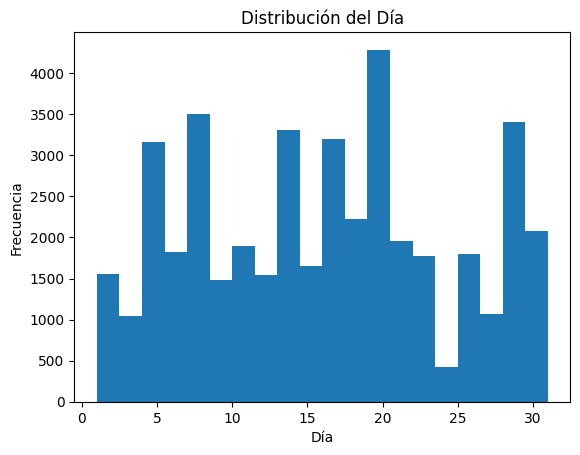

In [44]:
#DAY

plt.hist(data['day'], bins=20)
plt.xlabel('Día')
plt.ylabel('Frecuencia')
plt.title('Distribución del Día')
plt.show()

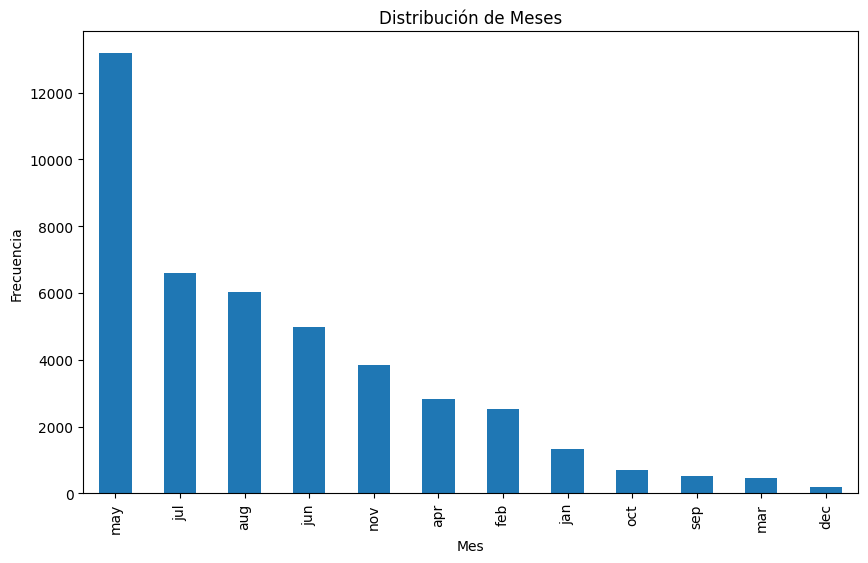

In [46]:
#MONTH

plt.figure(figsize=(10, 6))
data['month'].value_counts().plot(kind='bar')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.title('Distribución de Meses')
plt.show()

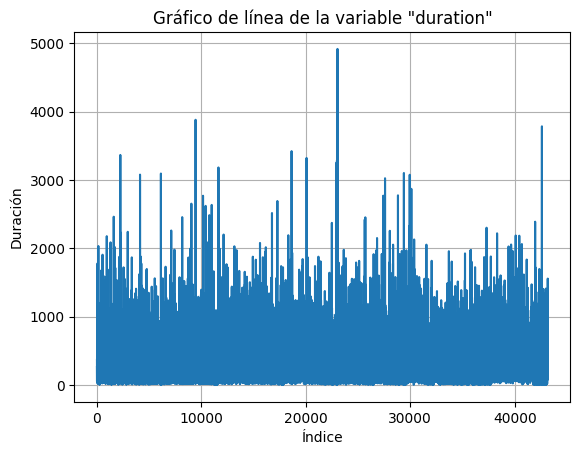

In [48]:
#DURATION

plt.plot(data.index, data['duration'])
plt.title('Gráfico de línea de la variable "duration"')
plt.xlabel('Índice')
plt.ylabel('Duración')
plt.grid(True)
plt.show()


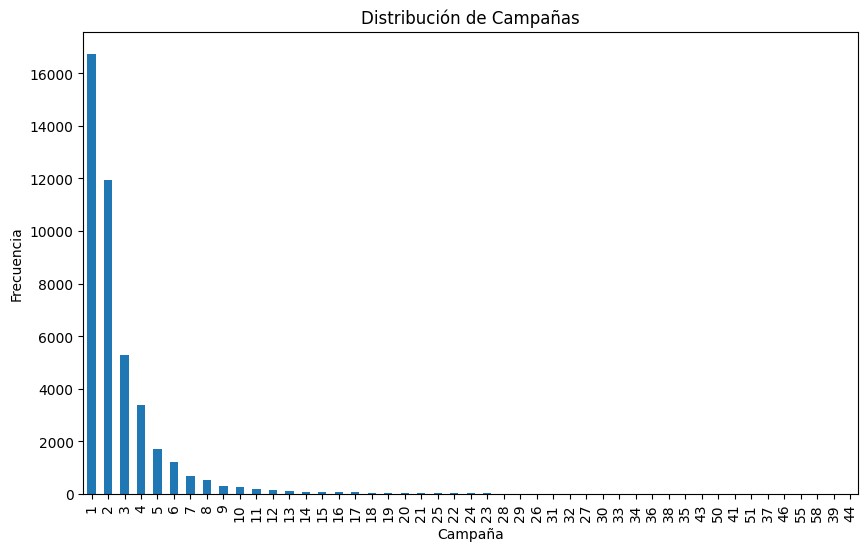

In [49]:
#CAMPAIGN

plt.figure(figsize=(10, 6))
data['campaign'].value_counts().plot(kind='bar')
plt.xlabel('Campaña')
plt.ylabel('Frecuencia')
plt.title('Distribución de Campañas')
plt.show()


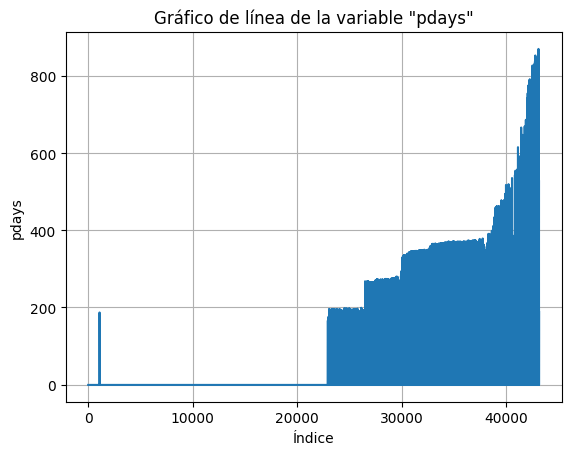

In [50]:
#PDAYS

plt.plot(data.index, data['pdays'])
plt.title('Gráfico de línea de la variable "pdays"')
plt.xlabel('Índice')
plt.ylabel('pdays')
plt.grid(True)
plt.show()


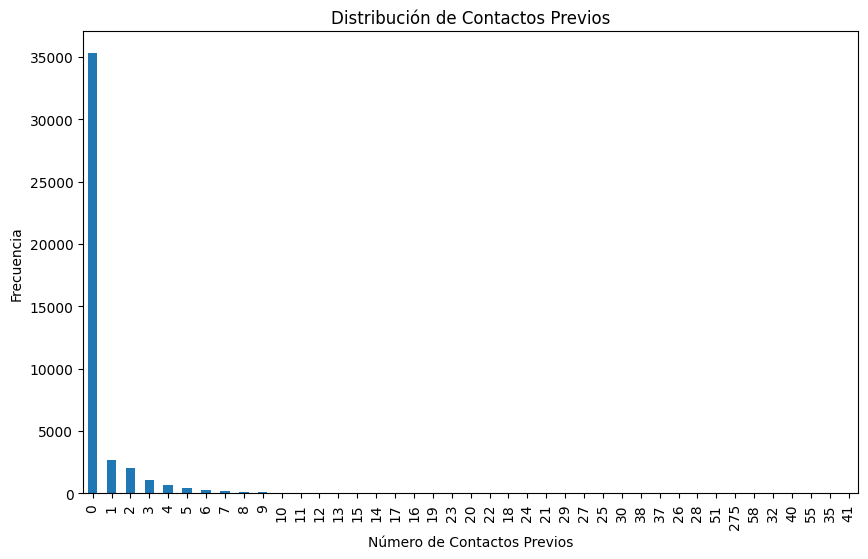

In [51]:
#PREVIOUS

plt.figure(figsize=(10, 6))
data['previous'].value_counts().plot(kind='bar')
plt.xlabel('Número de Contactos Previos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Contactos Previos')
plt.show()


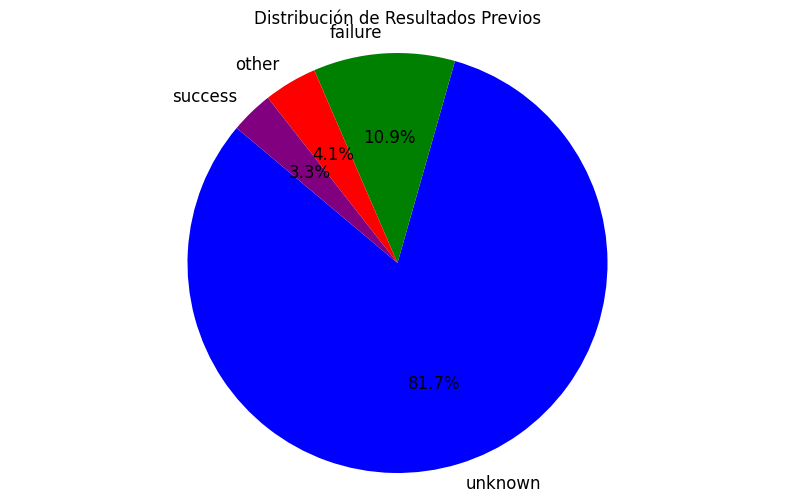

In [52]:
#POUTCOME

# Calcular la frecuencia de cada categoría
poutcome_counts = data['poutcome'].value_counts()

# Calcular porcentaje de cada categoría
poutcome_percentages = (poutcome_counts / poutcome_counts.sum()) * 100

# Definir colores para cada barra
colors = ['blue', 'green', 'red', 'purple']

plt.figure(figsize=(10, 6))
patches, texts, autotexts = plt.pie(poutcome_percentages, labels=poutcome_percentages.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Resultados Previos')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Cambiar el tamaño del texto en las etiquetas y en los porcentajes
for text in texts + autotexts:
    text.set_fontsize(12)

plt.show()


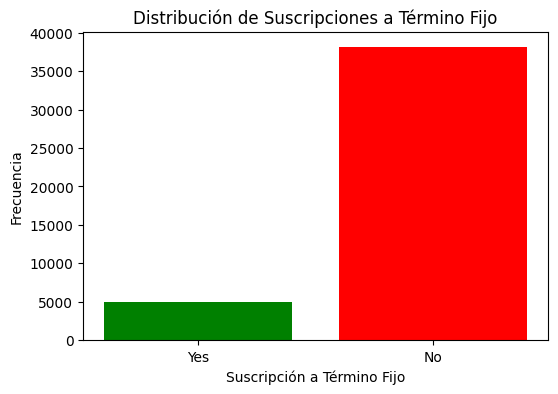

In [53]:
#Y

# Dividir los datos en dos conjuntos basados en los valores de 'y'
y_yes = data[data['y'] == 'yes']
y_no = data[data['y'] == 'no']

plt.figure(figsize=(6, 4))

# Gráfico de barras para 'yes' en verde
y_yes_counts = y_yes['y'].value_counts()
plt.bar('Yes', y_yes_counts, color='green')

# Gráfico de barras para 'no' en rojo
y_no_counts = y_no['y'].value_counts()
plt.bar('No', y_no_counts, color='red')

plt.xlabel('Suscripción a Término Fijo')
plt.ylabel('Frecuencia')
plt.title('Distribución de Suscripciones a Término Fijo')
plt.show()


## 2. ANÁLISIS BIVARIANTE

En esta segunda fase analizamos pares de variables que creemos que pueden tener relación e importancia directa y analizamos su comportamiento, como podría ser la relación entre la edad y el saldo de la cuenta o la distribución de las suscripciones a término fijo (variable 'y') entre diferentes estados civiles (variable 'marital').

En cualquier momento del estudio se pueden ir aplicando relaciones en un momento dado.

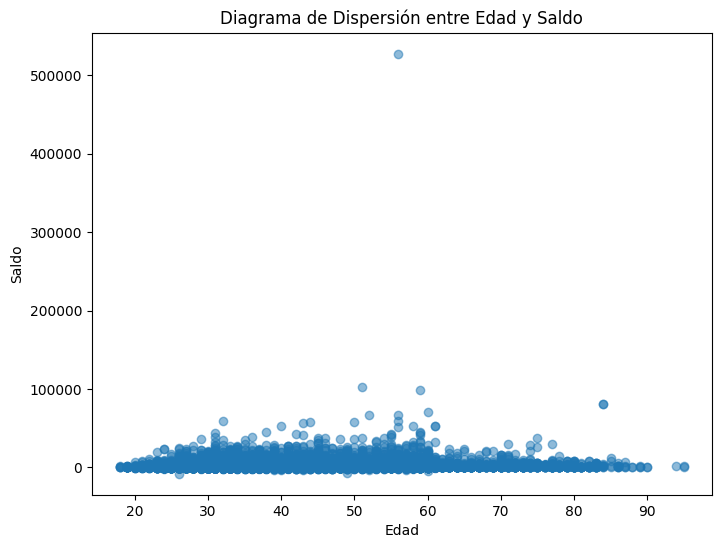

In [61]:
plt.figure(figsize=(8, 6))
plt.scatter(data['age'], data['balance'], alpha=0.5)
plt.xlabel('Edad')
plt.ylabel('Saldo')
plt.title('Diagrama de Dispersión entre Edad y Saldo')
plt.show()


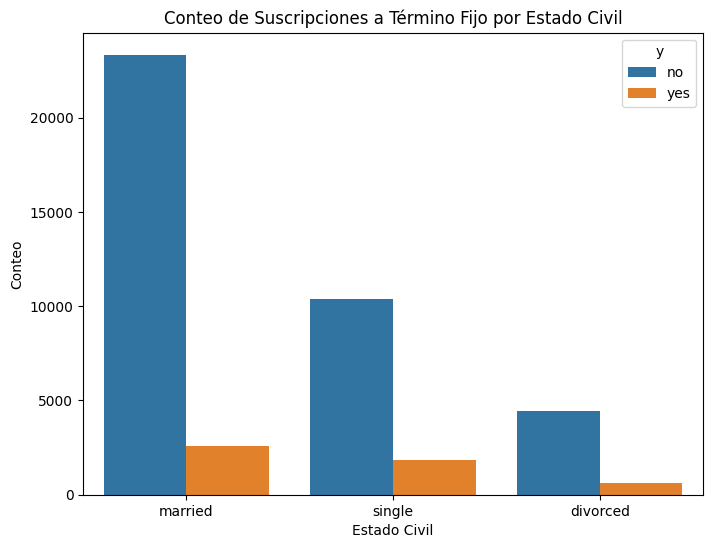

In [62]:
plt.figure(figsize=(8, 6))
sns.countplot(x='marital', hue='y', data=data)
plt.xlabel('Estado Civil')
plt.ylabel('Conteo')
plt.title('Conteo de Suscripciones a Término Fijo por Estado Civil')
plt.show()


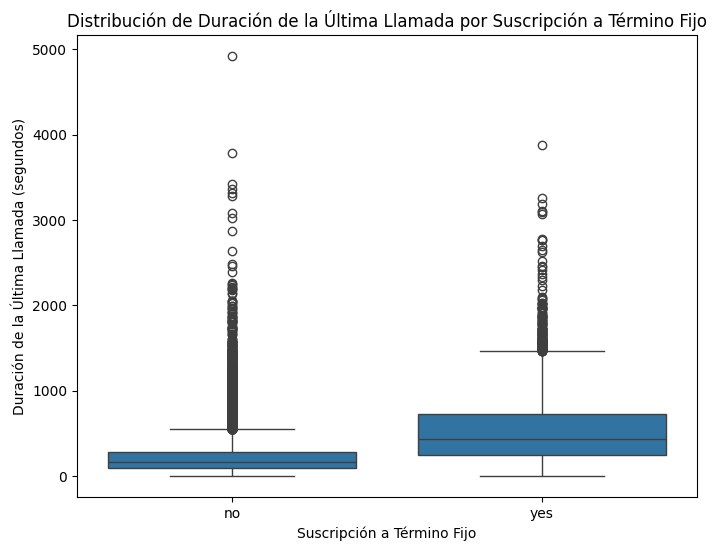

In [63]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='duration', data=data)
plt.xlabel('Suscripción a Término Fijo')
plt.ylabel('Duración de la Última Llamada (segundos)')
plt.title('Distribución de Duración de la Última Llamada por Suscripción a Término Fijo')
plt.show()


Estos son algunos ejemplos, pero en un análisis explotario profundo podemos hacer muchas combinaciones más para entender al completo el funcionamiento y la distribución del dataset.

## 3. ANÁLISIS MULTIVARIANTE

Como análisis multivariante, el mapa de correlación es muy útil, ya que nos muestra de manera visual todas las variables numéricas y la dependencia que tienen unas de otras, es decir, su relación directa. Esto nos lleva también de cara a futuro a poder realizar más análisis entre pares de variables.

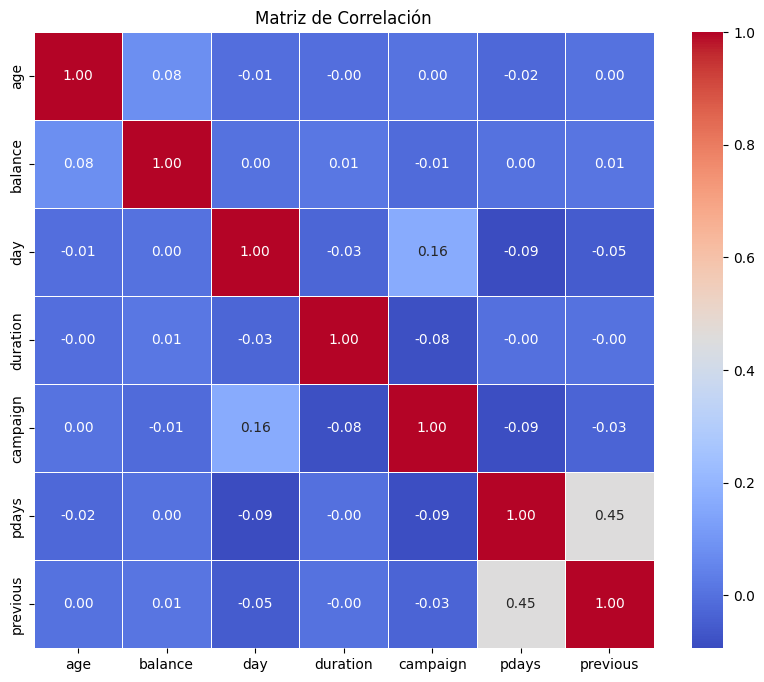

In [60]:
# Seleccionar solo las columnas numéricas
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_data.corr()

# Visualizar la matriz de correlación usando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


# Conclusiones

En general, este estudio proporciona una comprensión inicial de los datos y las posibles relaciones entre las variables. Para una comprensión más profunda y para construir modelos predictivos, sería necesario realizar análisis más detallados, como ingeniería de características, selección de modelos y evaluación de rendimiento del modelo.